## Dataset exploration

- 2D Semantic Labeling - Vaihingen data
: https://www2.isprs.org/commissions/comm2/wg4/benchmark/2d-sem-label-vaihingen/

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
path_labels = './data/labels/'
path_images = './data/images/top/'
labels_list = os.listdir(path_labels)
images_list = os.listdir(path_images)

In [3]:
len(labels_list), len(images_list)

(33, 33)

In [5]:
valid_ids = [i.replace('top_mosaic_09cm_area', '').replace('.tif', '') for i in images_list]
len(valid_ids)

33

In [6]:
sample = np.random.choice(valid_ids)
im_path = f'{path_images}/top_mosaic_09cm_area{sample}.tif'
la_path = f'{path_labels}/top_mosaic_09cm_area{sample}.tif'

./data/images/top//top_mosaic_09cm_area20.tif


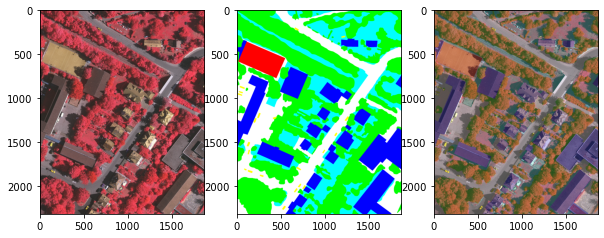

In [7]:
print(im_path)
im = plt.imread(im_path)
labels = plt.imread(la_path)
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(im)
plt.subplot(1,3,2)
plt.imshow(labels)
plt.subplot(1,3,3)
plt.imshow(im)
plt.imshow(labels, alpha=0.2)

### split mask

#### get unique label colors

In [37]:
# color_labels = []
# for sample in tqdm(valid_ids):
#     la_path = f'{path_labels}/top_mosaic_09cm_area{sample}.tif'
#     _labels = plt.imread(la_path)
#     color_labels.append(np.unique(np.vstack(_labels), axis=0))
# colors = np.unique(np.concatenate(color_labels), axis=0)    

100%|███████████████████████████████████████████████████████████████████| 33/33 [02:31<00:00,  4.60s/it]


/data/IM_challenge/env_torch_IM/lib/python3.7/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


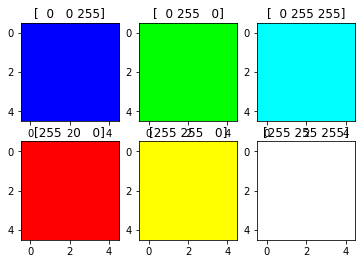

In [47]:
# plt.figure()
# for i in range(6):
#     patch = np.ones((5,5,3)).astype('uint8')
#     patch[:,:,0] = colors[i][0]
#     patch[:,:,1] = colors[i][1]
#     patch[:,:,2] = colors[i][2]
#     ax = plt.subplot(2,3,i+1)
#     ax.set_title(colors[i])
#     plt.imshow(patch)

In [8]:
label_color_map = {
    'surface': [255, 255, 255],
    'bluiding': [0,0,255],
    'low_veg': [0, 255, 255],
    'background': [255, 0, 0],
    'car': [255, 255, 0],
    'tree': [0, 255, 0]}

./data/images/top//top_mosaic_09cm_area20.tif


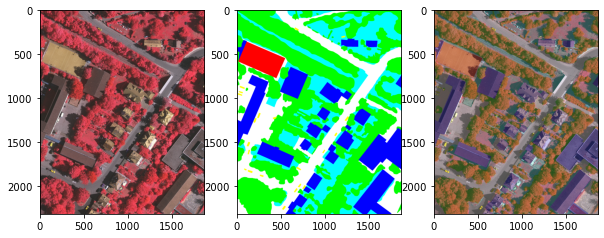

In [26]:
print(im_path)
im = plt.imread(im_path)
labels = plt.imread(la_path)
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(im)
plt.subplot(1,3,2)
plt.imshow(labels)
plt.subplot(1,3,3)
plt.imshow(im)
plt.imshow(labels, alpha=0.2)

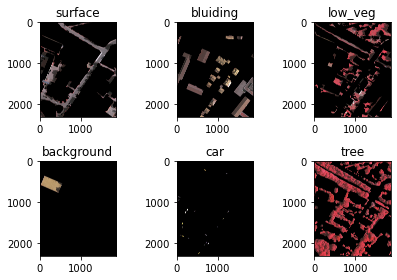

In [33]:
plt.figure()
for i, (k, c) in enumerate(label_color_map.items()):
    color_filter = labels == c
    im = plt.imread(im_path)
    ax = plt.subplot(2,3,1+i)
    ax.set_title(k)
    im[~np.all(color_filter, axis=2)]=0
    plt.imshow(im)
plt.tight_layout()